In [1211]:
# Importing necessary libraries for data manipulation, numerical operations, machine learning, and visualization.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [1212]:
# Loading the Tesla stock data from a CSV file into a DataFrame.
df=pd.read_csv('./Demo Datasets/TSLA.csv')

In [1213]:
df_tsla=pd.read_csv('./Demo Datasets/TSLA.csv')

In [1214]:
# Displaying the first few rows of the DataFrame to inspect the data.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [1215]:
# Getting summary statistics for the numerical columns in the DataFrame.
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,289.108428,297.288412,280.697937,289.997067,289.997067,7.530795e+07
std,167.665389,171.702889,163.350196,168.995613,168.995613,4.013706e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.735770e+07
25%,148.367996,154.990005,143.222000,149.792007,149.792007,4.713450e+07
50%,244.296005,245.600006,237.119995,241.731995,241.731995,7.025550e+07
75%,421.390015,430.500000,410.579987,421.200012,421.200012,9.454550e+07
max,699.989990,718.719971,691.119995,705.669983,705.669983,3.046940e+08


In [1216]:
# Reindexing the DataFrame using the 'Date' column to facilitate time-series analysis (commented out).
# reindex data using DatatimeIndex
# df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

In [1217]:
# Keeping only the 'Adj Close' column, which represents the adjusted closing prices after splits and dividends (commented out).
# keep only the Adj Close Value
# df=df[['Adj Close']]

In [1218]:
# Displaying the first few rows of the DataFrame to inspect the data.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [1219]:
# Getting a concise summary of the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


<AxesSubplot:>

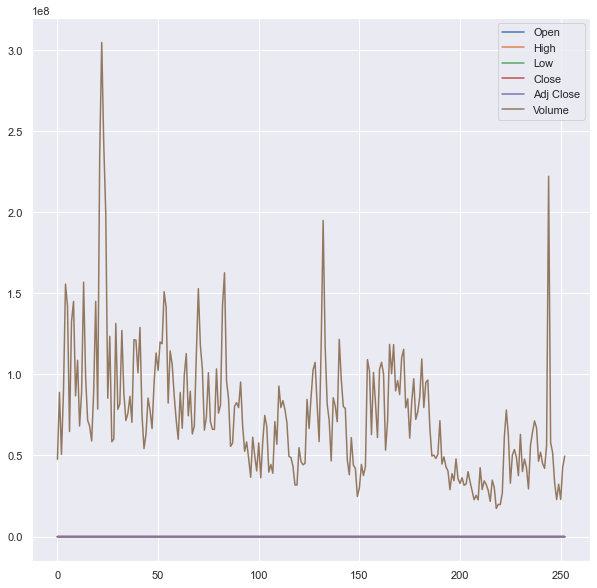

In [1220]:
# Plotting the data to visualize trends or patterns in the 'Adj Close' prices.
df.plot(figsize=(10,10),)

In [1221]:
# Importing the pandas_ta library to calculate technical indicators like the Exponential Moving Average (EMA).
import pandas_ta

In [1222]:
# Adding a 10-day Exponential Moving Average (EMA) to the DataFrame to identify trends.
# add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into our existing dataframe

df.ta.ema(close="Adj Close",len=10,append=True)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
248    643.572394
249    647.230141
250    650.641022
251    658.666296
252    667.212421
Name: EMA_10, Length: 253, dtype: float64

In [1223]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_10
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,NaN
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,NaN
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,NaN
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,NaN
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500,NaN
5,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000,NaN
6,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500,NaN
7,2020-01-13,98.699997,105.125999,98.400002,104.972000,104.972000,132588000,NaN
8,2020-01-14,108.851997,109.482002,104.980003,107.584000,107.584000,144981000,NaN
9,2020-01-15,105.952003,107.568001,103.358002,103.699997,103.699997,86844000,96.535599


In [1224]:
df=df.iloc[10:]

In [1225]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,EMA_10
10,2020-01-16,98.750000,102.891998,98.433998,102.697998,102.697998,108683500,97.656035
11,2020-01-17,101.522003,103.134003,100.632004,102.099998,102.099998,68145500,98.464028
12,2020-01-21,106.050003,109.716003,105.681999,109.440002,109.440002,89017500,100.459660
13,2020-01-22,114.377998,118.900002,111.820000,113.912003,113.912003,156845000,102.905540
14,2020-01-23,112.849998,116.400002,111.120003,114.440002,114.440002,98255000,105.002715
15,2020-01-24,114.125999,114.772003,110.851997,112.963997,112.963997,71768000,106.450221
16,2020-01-27,108.398003,112.888000,107.856003,111.603996,111.603996,68040500,107.387271
17,2020-01-28,113.697998,115.362000,111.615997,113.379997,113.379997,58942500,108.476858
18,2020-01-29,115.138000,117.959999,113.486000,116.197998,116.197998,89007500,109.880701
19,2020-01-30,126.484001,130.175995,123.599998,128.162003,128.162003,145028500,113.204574


In [1226]:
# Checking the column names to confirm the structure of the DataFrame after adding the EMA.
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'EMA_10'],
      dtype='object')

<AxesSubplot:>

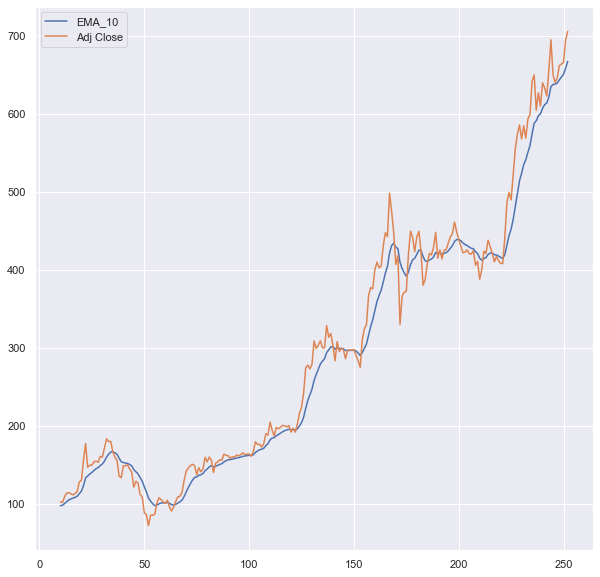

In [1227]:
df[['EMA_10','Adj Close']].plot(figsize=(10,10))

In [1228]:
# Preparing the feature set (X) with relevant stock price columns and splitting the data into training and test sets.
X=df[['Adj Close', 'Open', 'High', 'Low']].reset_index()

print(X)

X_train,X_test,y_train,y_test=train_test_split(X,df[['EMA_10']],test_size=.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


     index   Adj Close        Open        High         Low
0       10  102.697998   98.750000  102.891998   98.433998
1       11  102.099998  101.522003  103.134003  100.632004
2       12  109.440002  106.050003  109.716003  105.681999
3       13  113.912003  114.377998  118.900002  111.820000
4       14  114.440002  112.849998  116.400002  111.120003
..     ...         ...         ...         ...         ...
238    248  661.770020  642.989990  666.090027  641.000000
239    249  663.690002  674.510010  681.400024  660.799988
240    250  665.989990  661.000000  669.900024  655.000000
241    251  694.780029  672.000000  696.599976  668.359985
242    252  705.669983  699.989990  718.719971  691.119995

[243 rows x 5 columns]


In [1229]:
# Initializing and training a Linear Regression model on the standardized training data.
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [1230]:
# Making predictions on the test data using the trained Linear Regression model.
y_pred=model.predict(X_test)

In [1231]:
# Importing metrics to evaluate the model's performance and calculating error metrics like MAE and R².
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [1232]:
print('Model coefficients: ',model.coef_)
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred))
print('Coefficient of determination: ',r2_score(y_test, y_pred))

Model coefficients:  [[ 15.45836611  69.96764595  85.09152247 -13.67451807   3.7022835 ]]
Mean Absolute Error:  12.952305952045005
Coefficient of determination:  0.9868015012418532


In [1233]:
sns.set_theme(color_codes=True)

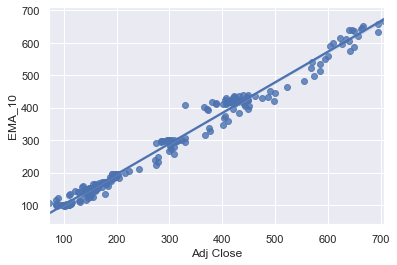

In [1234]:
# Visualizing the relationship between actual 'Adj Close' prices and the model's predicted values.
sns.regplot(x="Adj Close", y="EMA_10", data=df);

In [1235]:
X

,index,Adj Close,Open,High,Low
0,10,102.697998,98.750000,102.891998,98.433998
1,11,102.099998,101.522003,103.134003,100.632004
2,12,109.440002,106.050003,109.716003,105.681999
3,13,113.912003,114.377998,118.900002,111.820000
4,14,114.440002,112.849998,116.400002,111.120003
...,...,...,...,...,...
238,248,661.770020,642.989990,666.090027,641.000000
239,249,663.690002,674.510010,681.400024,660.799988
240,250,665.989990,661.000000,669.900024,655.000000
241,251,694.780029,672.000000,696.599976,668.359985


In [1236]:
# Applying the trained model to predict closing prices for the entire dataset and adding predictions to the DataFrame.
X['Predicted Close']=model.predict(X)
X.head()

,index,Adj Close,Open,High,Low,Predicted Close
0,10,102.697998,98.750000,102.891998,98.433998,14990.297436
1,11,102.099998,101.522003,103.134003,100.632004,15204.617445
2,12,109.440002,106.050003,109.716003,105.681999,16047.623861
3,13,113.912003,114.377998,118.900002,111.820000,16981.757243
4,14,114.440002,112.849998,116.400002,111.120003,16935.733318


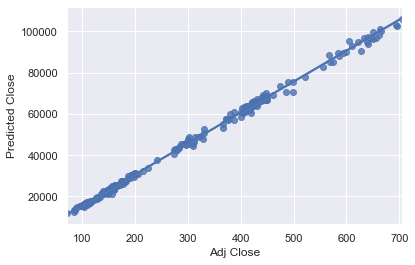

In [1238]:
# Visualizing the relationship between actual 'Adj Close' prices and the model's predicted values.
sns.regplot(x="Adj Close", y="Predicted Close", data=X);

In [1079]:
# Generating a trade signal based on whether the predicted close is higher than the opening price.
X['Target']=X['Open']<X['Predicted Close']

print(X['Target'].value_counts())

True    243
Name: Target, dtype: int64


In [1080]:
is_a_trade=X['Target']==True
X=X[is_a_trade]

X.shape

(243, 7)

In [1081]:
X.reset_index(inplace=True)

In [1082]:
# Initializing a 'Gain' column to track the cumulative gains from the trading strategy, starting with an initial investment.
X['Gain']=0

In [1083]:
X.head()

,level_0,index,Adj Close,Open,High,Low,Predicted Close,Target,Gain
0,0,10,102.697998,98.750000,102.891998,98.433998,15125.546703,True,0
1,1,11,102.099998,101.522003,103.134003,100.632004,15405.343422,True,0
2,2,12,109.440002,106.050003,109.716003,105.681999,16208.381920,True,0
3,3,13,113.912003,114.377998,118.900002,111.820000,17308.755507,True,0
4,4,14,114.440002,112.849998,116.400002,111.120003,17140.725581,True,0


In [1084]:
X.at[0,'Gain']=1000

In [1085]:
X.head()

,level_0,index,Adj Close,Open,High,Low,Predicted Close,Target,Gain
0,0,10,102.697998,98.750000,102.891998,98.433998,15125.546703,True,1000
1,1,11,102.099998,101.522003,103.134003,100.632004,15405.343422,True,0
2,2,12,109.440002,106.050003,109.716003,105.681999,16208.381920,True,0
3,3,13,113.912003,114.377998,118.900002,111.820000,17308.755507,True,0
4,4,14,114.440002,112.849998,116.400002,111.120003,17140.725581,True,0


In [1086]:
# Defining a function to calculate the gain based on the percentage increase in stock price from open to close.
def calcGain(open_price, close_price, inv_size):
    percentage_increase=(close_price-open_price)/open_price
    return inv_size+(inv_size*percentage_increase)

for index, row in X.iterrows():
    if index > 0 :
        prev_inv=X.loc[[index-1]]['Gain']
        gains=calcGain(row['Open'],row['Adj Close'], prev_inv)
        X.at[index,'Gain']=gains

In [1087]:
len(X)

243

In [1088]:
X.tail(10)

,level_0,index,Adj Close,Open,High,Low,Predicted Close,Target,Gain
233,233,243,655.900024,628.190002,658.820007,619.500000,97358.068538,True,1258
234,234,244,695.000000,668.900024,695.000000,628.539978,101404.554832,True,1307
235,235,245,649.859985,666.239990,668.500000,646.070007,101013.072949,True,1274
236,236,246,640.340027,648.000000,649.880005,614.229980,97657.205387,True,1258
237,237,247,645.979980,632.200012,651.500000,622.570007,97473.162504,True,1285
238,238,248,661.770020,642.989990,666.090027,641.000000,99676.784439,True,1322
239,239,249,663.690002,674.510010,681.400024,660.799988,102859.562714,True,1300
240,240,250,665.989990,661.000000,669.900024,655.000000,101557.690756,True,1309
241,241,251,694.780029,672.000000,696.599976,668.359985,103983.703472,True,1353
242,242,252,705.669983,699.989990,718.719971,691.119995,107458.823930,True,1363


In [1089]:
X.shape

(243, 9)

this is not correct the gain is proportional to the amount invested you need to calculate the percentage increase to apply it to the investment size

<AxesSubplot:>

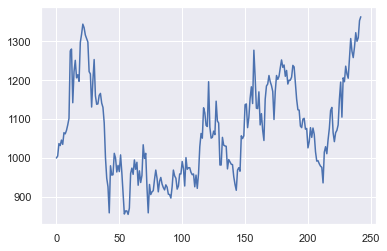

In [1090]:
# Plotting the cumulative gains from the trade signals over time to evaluate the strategy's performance.
X['Gain'].plot()

In [1125]:
# Loading the 2021 Tesla stock data and preparing it for a similar analysis to see how the strategy performs on new data.
df_tsla_2021=pd.read_csv('./Demo Datasets/TSLA_2021.csv')

In [1133]:
X_2021=df_tsla_2021[['Adj Close', 'Open', 'High', 'Low']].reset_index()

X_2021.head()

,index,Adj Close,Open,High,Low
0,0,714.500000,762.640015,768.500000,710.200012
1,1,698.840027,662.130005,713.609985,619.000000
2,2,742.020020,711.849976,745.000000,694.169983
3,3,682.219971,726.150024,737.210022,670.580017
4,4,675.500000,700.000000,706.700012,659.510010


In [1134]:
X_2021_sc=scaler.transform(X_2021)

X_2021.ta.ema(close="Adj Close",len=10,append=True)

X_2021.fillna(0, inplace=True)

X_train_2021,X_test_2021,y_train_2021,y_test_2021=train_test_split(X_2021_sc,X_2021[['EMA_10']],test_size=.2)

model.fit(X_train_2021,y_train_2021)

X_2021['Predicted Close']=model.predict(X_2021_sc)

X_2021.head()

X_2021['Target']=X_2021['Open']<X_2021['Predicted Close']

is_a_trade=X_2021['Target']==True
X_2021=X_2021[is_a_trade]



In [1136]:
X_2021.shape


(90, 9)

In [1141]:
X_2021['Gain']=0

X_2021.at[0,'Gain']=100

In [1145]:
y_pred_2021=model.predict(X_test_2021)

print('Model coefficients: ',model.coef_)
print('Mean Absolute Error: ',mean_absolute_error(y_test_2021, y_pred_2021))
print('Coefficient of determination: ',r2_score(y_test_2021, y_pred_2021))

Model coefficients:  [[ 109.50756175  156.73588681  137.11562547 -230.41724665   29.89749192]]
Mean Absolute Error:  82.32747514623624
Coefficient of determination:  0.7380043488949025


In [1139]:
# Defining a function to calculate the gain based on the percentage increase in stock price from open to close.
def calcGain(open_price, close_price, inv_size):
    percentage_increase=(close_price-open_price)/open_price
    return inv_size+(inv_size*percentage_increase)

for index, row in X_2021.iterrows():
    if index > 0 :
        prev_inv=X_2021.loc[[index-1]]['Gain']
        gains=calcGain(row['Open'],row['Adj Close'], prev_inv)
        X_2021.at[index,'Gain']=gains

KeyError: "None of [Int64Index([101], dtype='int64')] are in the [index]"

<AxesSubplot:>

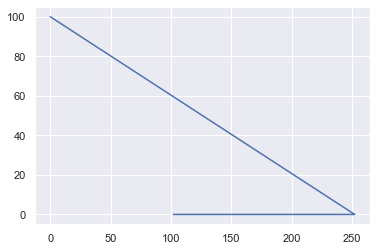

In [1140]:
X_2021['Gain'].plot()